# Flight Price Prediction

# Problem Statement

Flight ticket prices can be something hard to guess, today we might see a price, check
out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain.

# Importing the important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loadning The Data

In [2]:
df=pd.read_excel("Flight_Fare.xlsx")

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [6]:
df.shape

(10683, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Attribute Information : 

**Airline** : So this column will have all the types of airlines like Indigo, Jet Airways, Air India, and many more.

**Date_of_Journey** : This column will let us know about the date on which the passenger’s journey will start.

**Source** : This column holds the name of the place from where the passenger’s journey will start.

**Destination** : This column holds the name of the place to where passengers wanted to travel.

**Route** : Here we can know about what the route is through which passengers have opted to travel from his/her source to their destination.

Dep_Time represents the scheduled departure time of the flight

**Arrival_Time** : Arrival time is when the passenger will reach his/her destination.

**Duration** : Duration is the whole period that a flight will take to complete its journey from source to destination.

**Total_Stops** : This will let us know in how many places flights will stop there for the flight in the whole journey.

**Additional_Info** : In this column, we will get information about food, kind of food, and other amenities.

**Price** : Price of the flight for a complete journey including all the expenses before onboarding.

In [8]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
df.describe(include="O")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [10]:
for col in df.columns:
    print(f"vlaue count of column:{col}")
    print(df[col].value_counts(dropna=False))

vlaue count of column:Airline
Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64
vlaue count of column:Date_of_Journey
Date_of_Journey
18/05/2019    504
6/06/2019     503
21/05/2019    497
9/06/2019     495
12/06/2019    493
9/05/2019     484
21/03/2019    423
15/05/2019    405
27/05/2019    382
27/06/2019    355
24/06/2019    351
1/06/2019     342
3/06/2019     333
15/06/2019    328
24/03/2019    323
6/03/2019     308
27/03/2019    299
24/05/2019    286
6/05/2019     282
1/05/2019     277
12/05/2019    259


In [11]:
df.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

We dropped unused columns to reduce complexity and avoid unnecessary processing.
Columns like Route, Additional_Info may not add useful value (you already have Total_Stops, Duration).

# EDA

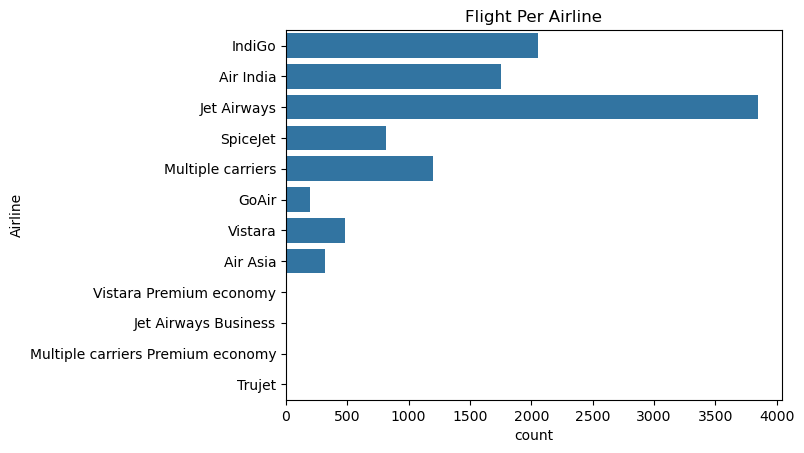

In [12]:
sns.countplot(y='Airline',data=df)
plt.title("Flight Per Airline")
plt.show()

* Jet Airways, IndiGo, and Air India have the highest number of flights, showing they are the most frequent airlines in this dataset.

* Airlines like Trujet, Vistara Premium Economy, and Jet Airways Business have very few flights, making them rare categories.

* The airline data is imbalanced, so it's a good idea to group rare airlines into an "Other" category to improve model stability.

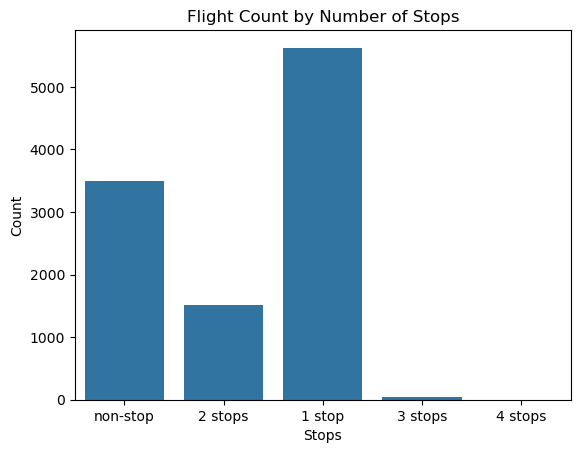

In [13]:
# Total stops
sns.countplot(x="Total_Stops",data=df)
plt.title("Flight Count by Number of Stops")
plt.xlabel("Stops")
plt.ylabel("Count")
plt.show()

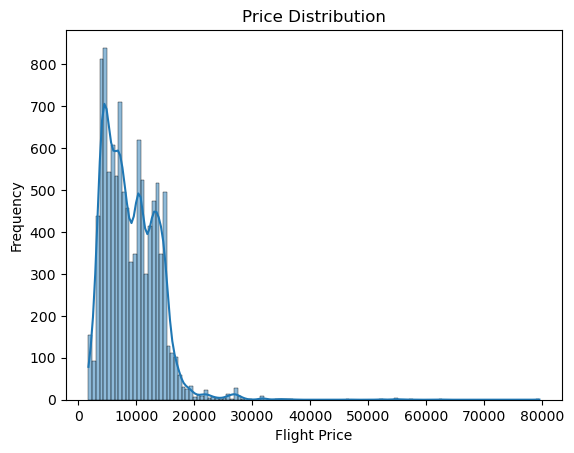

In [14]:
# Distributoion of price
sns.histplot(df["Price"],kde=True)
plt.title("Price Distribution")
plt.xlabel("Flight Price")
plt.ylabel("Frequency")
plt.show()

* Most flight prices are between ₹2,000 and ₹15,000, showing that budget to mid-range flights are very common.

* The distribution is right-skewed, which means a small number of flights are very expensive.

* Prices are not normally distributed so many models may need transformations.

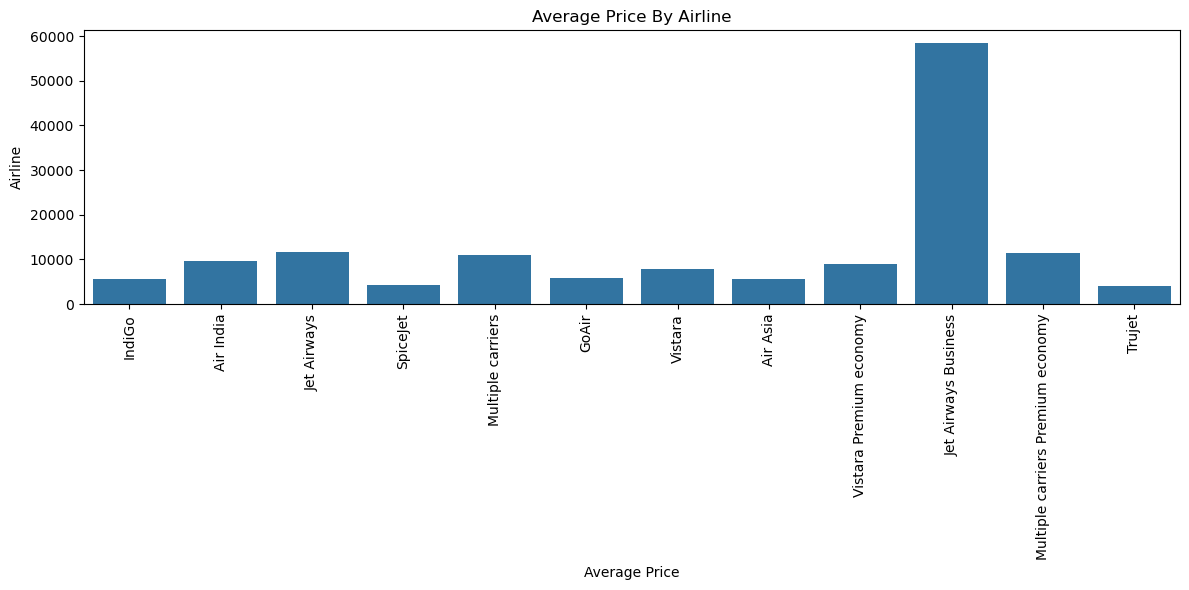

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x="Airline",y="Price",estimator="mean",ci=None)
plt.xticks(rotation=90)
plt.title("Average Price By Airline")
plt.xlabel("Average Price")
plt.ylabel("Airline")
plt.tight_layout()
plt.show()

Jet Airways Business has the highest average flight price by a large margin, while airlines like IndiGo, Air Asia, SpiceJet, GoAir, and Trujet offer the lowest average prices; standard classes of Jet Airways, Air India, Vistara, and Multiple carriers fall in the mid-price range.

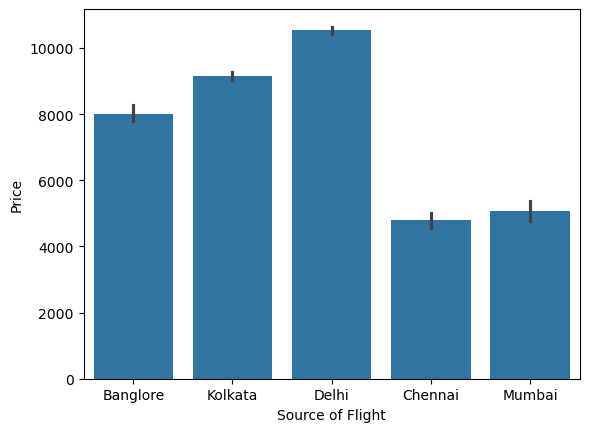

In [16]:
sns.barplot(x="Source",y="Price",data=df)
plt.xlabel("Source of Flight")
plt.ylabel("Price")
plt.show()

* *Flights starting from Delhi have the highest average price, which could be because of longer routes or business-class travelers.*

* *Flights from Chennai and Mumbai are the cheapest, showing these cities might offer more budget flights or shorter routes.*

* *Kolkata and Bangalore have medium average prices, indicating a balance between cheap and expensive flights.*

* *This shows that the city from where a flight starts affects its price, so Source is an important feature for prediction.*

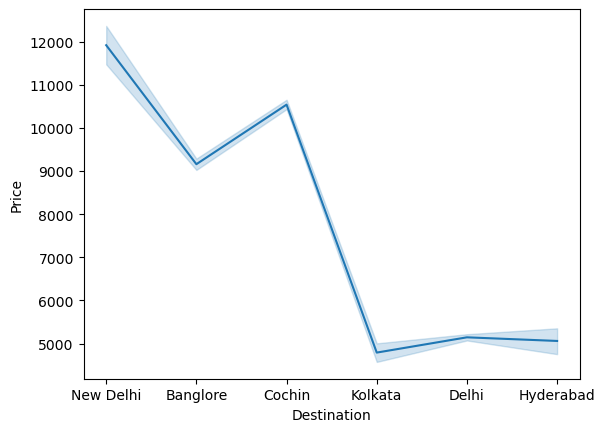

In [17]:
sns.lineplot(x="Destination",y="Price",data=df)
plt.xlabel("Destination")
plt.ylabel("Price")
plt.show()

* *Flights going to New Delhi, Cochin and Bangalore have the highest average price, making it the most expensive destination.*

* *Kolkata, Delhi, and Hyderabad have the lowest prices, meaning flights to these cities are more affordable.*

# Feature Engineering

In [18]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Price              0
dtype: int64

In [19]:
df['Total_Stops'].fillna(df['Total_Stops'].mode()[0], inplace=True)

In [20]:
df['Journey_day'] = pd.to_datetime(df['Date_of_Journey']).dt.day
df['Journey_month'] = pd.to_datetime(df['Date_of_Journey']).dt.month

In [21]:
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute
df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [22]:
duration = df['Duration'].str.extract('(?P<Hours>\d+)h\s*(?P<Minutes>\d*)m?')
duration['Hours'] = duration['Hours'].astype(float)
duration['Minutes'] = duration['Minutes'].replace('', 0).astype(float)
df['Duration_mins'] = duration['Hours'] * 60 + duration['Minutes']

In [23]:
df.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration'], axis=1, inplace=True)

In [24]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop': 0, '1 stop': 1, '2 stops': 2,
                                           '3 stops': 3, '4 stops': 4})

In [25]:
df = pd.get_dummies(df, columns=['Airline', 'Source', 'Destination'], drop_first=True, dtype=int)

In [26]:
df.isnull().sum()

Total_Stops                                  0
Price                                        0
Journey_day                                  0
Journey_month                                0
Dep_hour                                     0
Dep_min                                      0
Arrival_hour                                 0
Arrival_min                                  0
Duration_mins                                1
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multiple carriers                    0
Airline_Multiple carriers Premium economy    0
Airline_SpiceJet                             0
Airline_Trujet                               0
Airline_Vistara                              0
Airline_Vistara Premium economy              0
Source_Chennai                               0
Source_Delhi 

In [27]:
df.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [28]:
df['Duration_mins'].fillna(df['Duration_mins'].median(), inplace=True)

In [29]:
X = df.drop('Price', axis=1)
y = df['Price']

In [30]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [32]:
X=pd.DataFrame(X_scaled,columns=X.columns)
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_mins,Airline_Air India,Airline_GoAir,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,-1.220744,1.237383,-1.467490,1.654259,-0.235050,-1.800427,-0.890057,-0.931744,-0.442912,-0.135998,...,-0.01676,-0.19231,-0.859188,-0.606227,-0.264193,-0.859188,-0.366493,-0.264193,-0.19231,3.234571
1,1.741483,-1.475239,0.250276,-1.303095,1.363492,-0.050851,-0.587124,-0.390194,2.257787,-0.135998,...,-0.01676,-0.19231,-0.859188,1.649546,-0.264193,-0.859188,-0.366493,-0.264193,-0.19231,-0.309160
2,1.741483,-0.531719,1.109160,-0.607247,0.031373,-1.363033,0.018744,0.978449,-0.442912,-0.135998,...,-0.01676,-0.19231,1.163890,-0.606227,-0.264193,1.163890,-0.366493,-0.264193,-0.19231,-0.309160
3,0.260370,-0.177898,0.250276,0.958411,-1.034321,1.407129,0.321677,-0.626507,-0.442912,-0.135998,...,-0.01676,-0.19231,-0.859188,1.649546,-0.264193,-0.859188,-0.366493,-0.264193,-0.19231,-0.309160
4,0.260370,-1.475239,-1.467490,0.610487,1.363492,1.115533,0.624611,-0.705278,-0.442912,-0.135998,...,-0.01676,-0.19231,-0.859188,-0.606227,-0.264193,-0.859188,-0.366493,-0.264193,-0.19231,3.234571


In [33]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

# Training Model

In [34]:
# Train-Test Split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,accuracy_score,mean_absolute_error,mean_squared_error,root_mean_squared_error

lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
y_pred=lr_model.predict(X_test)

r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)

print("Linear Regression Testing Results:")
print("R\u00b2 Score",r2)
print(f"MSE:",mse)
print(f"RMSE:",rmse)
print(f"MAE:",mae)

Linear Regression Testing Results:
R² Score 0.6150332003359873
MSE: 8147424.280652952
RMSE: 2854.3693315079167
MAE: 1982.554122828233


In [37]:
y_pred=lr_model.predict(X_train)
r2=r2_score(y_train,y_pred)
r2

0.6250963102632638

In [38]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1.0)
ridge.fit(X_train,y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [39]:
# Evaluate
y_pred=ridge.predict(X_test)
print("R\u00b2 Score:",r2_score(y_test,y_pred))

R² Score: 0.6150342653016636


# Random Forest Regressor

In [44]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)
pred=model.predict(X_test)

print("R\u00b2 Score:",r2_score(y_test,pred))
print("RMSE:",root_mean_squared_error(y_test,pred))

R² Score: 0.8103891434075113
RMSE: 2003.2268300698875


In [45]:
pred=model.predict(X_train)

print("R\u00b2 Score:",r2_score(y_train,pred))
print("RMSE:",root_mean_squared_error(y_train,pred))

R² Score: 0.9530828221755212
RMSE: 999.3526699373554


In [46]:
rf=RandomForestRegressor(random_state=42)
param_grid={
    'n_estimators':[100,200,300],
    'max_depth':[10,20,None],
    'min_samples_split':[2,5],
    'min_samples_leaf':[1,2],
    'max_features':['auto','sqrt']
}

grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=0,scoring='r2')
grid_search.fit(X_train,y_train)
best_rf=grid_search.best_estimator_
print("Best Parameter:",grid_search.best_params_)

Best Parameter: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [47]:
y_pred=best_rf.predict(X_test)

# Evaluate Model
r2=r2_score(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)

print("Random Forest Regressor Testing Results:",r2)
print("RMSE :",rmse)

Random Forest Regressor Testing Results: 0.8236612055399668
RMSE : 1931.8458168942177


In [48]:
y_Tdt=best_rf.predict(X_train)

print("Random Forest Testing Results:",r2_score(y_train,y_Tdt))
print("RMSE:",root_mean_squared_error(y_train,y_Tdt))

Random Forest Testing Results: 0.9145463399301474
RMSE: 1348.7087381178064


# Decision Tree Algorithm

In [49]:
from sklearn.tree import DecisionTreeClassifier # call the decision tree model
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [50]:
y_dt=DT.predict(X_test)

print("R\u00b2 Score:",r2_score(y_test,y_dt))
print("RMSE:",root_mean_squared_error(y_test,y_dt))

R² Score: 0.661029604032277
RMSE: 2678.424528363889


In [51]:
y_Tdt=DT.predict(X_train)

print("R\u00b2 Score:",r2_score(y_train,y_Tdt))
print("RMSE:",root_mean_squared_error(y_train,y_Tdt))

R² Score: 0.9397928632454426
RMSE: 1132.0792336127179


In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeRegressor(random_state=42)

param_grid = {
    'criterion': ['squared_error', 'friedman_mse'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt', None]
}

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=10,
    n_jobs=-1,
    verbose=0,
    scoring='r2'
)

grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


# GradiantBoostingRegressor

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3,
                                      random_state=42)

gbr_model.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [54]:
y_pred_gb = gbr_model.predict(X_test)

r2 = r2_score(y_test, y_pred_gb)
rmse = root_mean_squared_error(y_test, y_pred_gb)

print("Regularized Gradient Boosting Regressor Testing Result:", r2)
print("RMSE:", rmse)

Regularized Gradient Boosting Regressor Testing Result: 0.7724622809913954
RMSE: 2194.4476666088385


In [55]:
y_pred_gb = gbr_model.predict(X_train)

r2 = r2_score(y_train, y_pred_gb)
rmse = root_mean_squared_error(y_train, y_pred_gb)

print("Regularized Gradient Boosting Regressor Training Result:", r2)
print("RMSE:", rmse)

Regularized Gradient Boosting Regressor Training Result: 0.7869768017386536
RMSE: 2129.4443125904695


In [56]:
gbr = GradientBoostingRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}

grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train, y_train)
best_gbr = grid_search.best_estimator_
print("Best Parameter:",grid_search.best_params_)

Best Parameter: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [57]:
y_pred_gb = best_gbr.predict(X_test)

r2 = r2_score(y_test, y_pred_gb)
rmse = root_mean_squared_error(y_test, y_pred_gb)

print("Regularized Gradient Boosting Regressor Testing Result:", r2)
print("RMSE:", rmse)

Regularized Gradient Boosting Regressor Testing Result: 0.8432866840781854
RMSE: 1821.1741538475533


In [58]:
y_pred_gb = best_gbr.predict(X_train)

r2 = r2_score(y_train, y_pred_gb)
rmse = root_mean_squared_error(y_train, y_pred_gb)

print("Regularized Gradient Boosting Regressor Training Result:", r2)
print("RMSE:", rmse)

Regularized Gradient Boosting Regressor Training Result: 0.9009337058115483
RMSE: 1452.164432946801


##  Business Insights from the Project
- **Airline** has a strong influence on price; business class and premium carriers significantly increase ticket cost.
- **Number of stops** affects fare — more stops often result in cheaper flights.
- **Source and Destination cities** show noticeable price trends — flights from Delhi and to New Delhi were often more expensive.
- **Departure/Arrival Time** impacts price; peak-hour flights tend to be more expensive.
- **Duration** and **journey month** also contribute to price variation, especially during holiday seasons.

## Challenges Faced & Solutions
| Challenge                                  | Solution                                                         |
|-------------------------------------------|------------------------------------------------------------------|
| Handling mixed time formats in `Duration`  | Converted all durations to minutes for uniformity               |
| Overfitting in ensemble models             | Applied hyperparameter tuning and regularization techniques     |
| Scaling only numerical values              | Used StandardScaler on continuous features only                 |
| High cardinality in categorical features   | Used one-hot encoding and grouped infrequent categories         |
| Imbalanced distributions & outliers        | Removed extreme outliers using IQR method                       |
| Large number of new encoded features       | Selected key contributors using feature importance              |


## Conclusion
This project shows how machine learning can effectively predict flight prices using features like airline, number of stops, source, destination, and travel time. Among all models tested gave the best results with a high R² score of 0.82, making it reliable for real-world use.

From a business point of view, this model can help airlines and travel websites offer dynamic pricing, create better deals, and understand what factors affect flight prices the most. It also helps improve customer experience by offering more accurate fare estimates, leading to smarter pricing and better sales strategies.